In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
c1 = np.loadtxt('c1.txt')
c2 = np.loadtxt('c2.txt')

In [6]:
c1.shape, c2.shape

((1000000, 10), (1000000, 10))

In [9]:
DOCS_IN_GROUP = 1000

def to_groups(c):
    out = np.zeros(len(c) // DOCS_IN_GROUP)
    for i in range(len(c) // DOCS_IN_GROUP):
        out[i] = np.mean(c[i*DOCS_IN_GROUP:(i+1)*DOCS_IN_GROUP, 0] > 0)
        
    return out

In [10]:
clicks_c1 = to_groups(c1)
clicks_c2 = to_groups(c2)

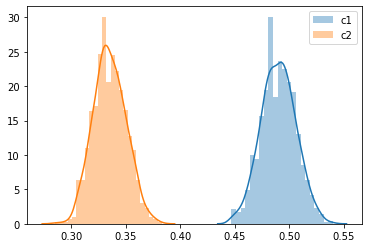

In [12]:
sns.distplot(clicks_c1, label='с1')
sns.distplot(clicks_c2, label='с2')

plt.legend()

In [13]:
def t_statistic(c1_sample, c2_sample):
    num = np.mean(c1_sample) - np.mean(c2_sample)
    denom = np.sqrt(np.var(c1_sample)/len(c1_sample) + np.var(c2_sample)/len(c2_sample))
    return num/denom

    
def sample_from(c_shifted, N = 1000, size = 500):
    return np.array([
        np.random.choice(c_shifted, size) for i in range(N)
    ])


def mean_diff_test(c1, c2, t_star = 1.96):
    c1_samples = sample_from(c1)
    c2_samples = sample_from(c2)
    
    t_stats = np.zeros(len(c1_samples))
    
    for i in range(len(c1_samples)):
        t_stat = t_statistic(c1_samples[i], c2_samples[i])
        t_stats[i] = t_stat
    
    return np.mean(t_stats >= t_star)

In [15]:
mean_diff_test(clicks_c1, clicks_c2)

1.0

Видимо, что средние отличаются